# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract Data

In [7]:
final_data = pd.read_csv('DataLoad/final_data.csv')
final_data = final_data.drop(columns=['Unnamed: 0'])
selected_country = final_data[final_data['country_name'].isin(['Haiti', 'Madagascar', 'Zambia'])]
selected_country = selected_country[selected_country['year'].isin([2011,2012,2013,2014,2015,2016])]
selected_country = selected_country.reset_index(drop=True)
selected_country.to_csv('data-to-analyze.csv')
selected_country

,country_name,year,population,gdp,rural_population_percent,electricity_access_percent,project_cost,gdp_per_capita
0,Haiti,2011,0.312922,0.127459,0.456334,0.363707,0.244850,0.090423
1,Haiti,2012,0.317572,0.133821,0.440660,0.378938,0.117041,0.094082
2,Haiti,2013,0.322174,0.143400,0.425642,0.372808,0.121723,0.100255
3,Haiti,2014,0.326728,0.148918,0.411292,0.377464,0.126713,0.103033
4,Haiti,2015,0.331242,0.148037,0.397610,0.382149,0.051498,0.100717
5,Haiti,2016,0.335705,0.135191,0.384607,0.386840,0.030712,0.089195
6,Madagascar,2011,0.686856,0.167937,0.692790,0.142914,0.102528,0.047769
7,Madagascar,2012,0.705881,0.168398,0.685615,0.177240,0.162032,0.046216
8,Madagascar,2013,0.725150,0.180016,0.678417,0.128913,0.080290,0.048735
9,Madagascar,2014,0.744734,0.181240,0.671220,0.185886,0.173268,0.047457


#### Correlation

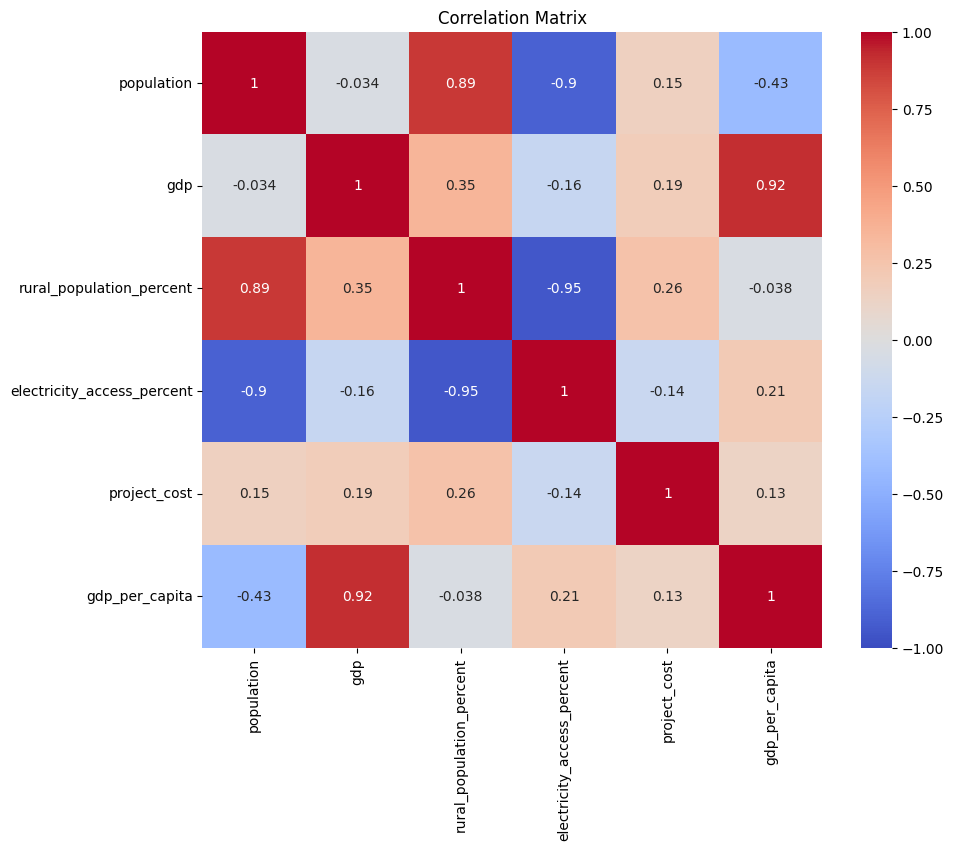

In [8]:
# Analisis Korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = selected_country.drop(columns=['country_name','year']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.savefig('image/correlation_matrix.png', dpi=300)
plt.show()


#### Distribution

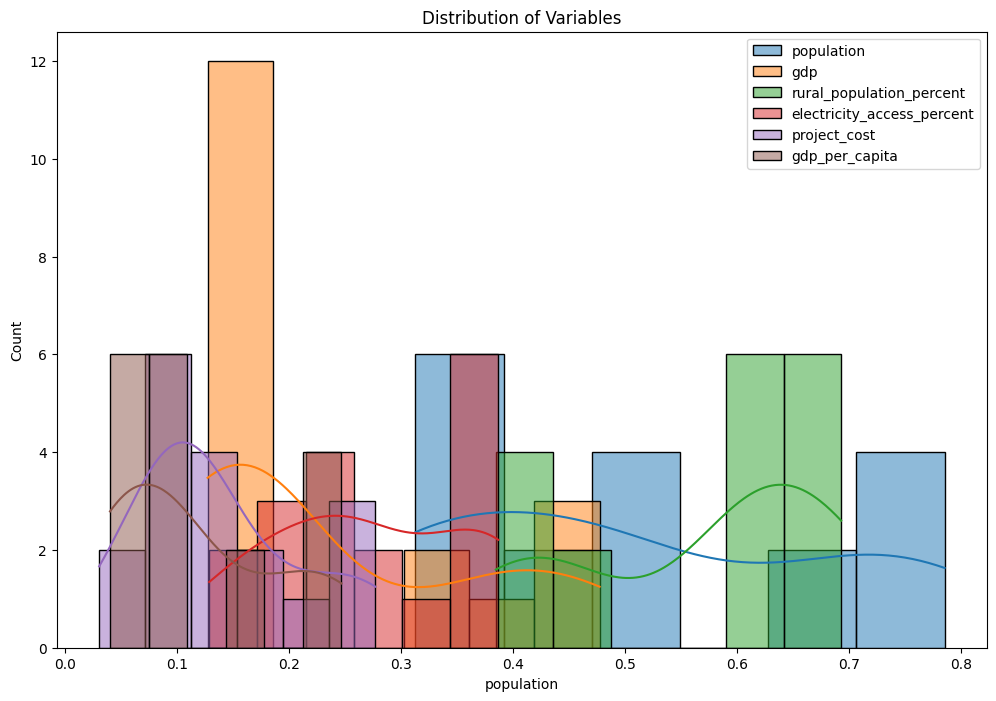

In [9]:
# Analisis Distribusi
plt.figure(figsize=(12, 8))
for column in ['population', 'gdp', 'rural_population_percent', 'electricity_access_percent', 'project_cost', 'gdp_per_capita']:
    sns.histplot(selected_country[column], kde=True, label=column)
plt.legend()
plt.title('Distribution of Variables')
plt.savefig('image/Distribution of Variables.png', dpi=300)
plt.show()


#### Tren

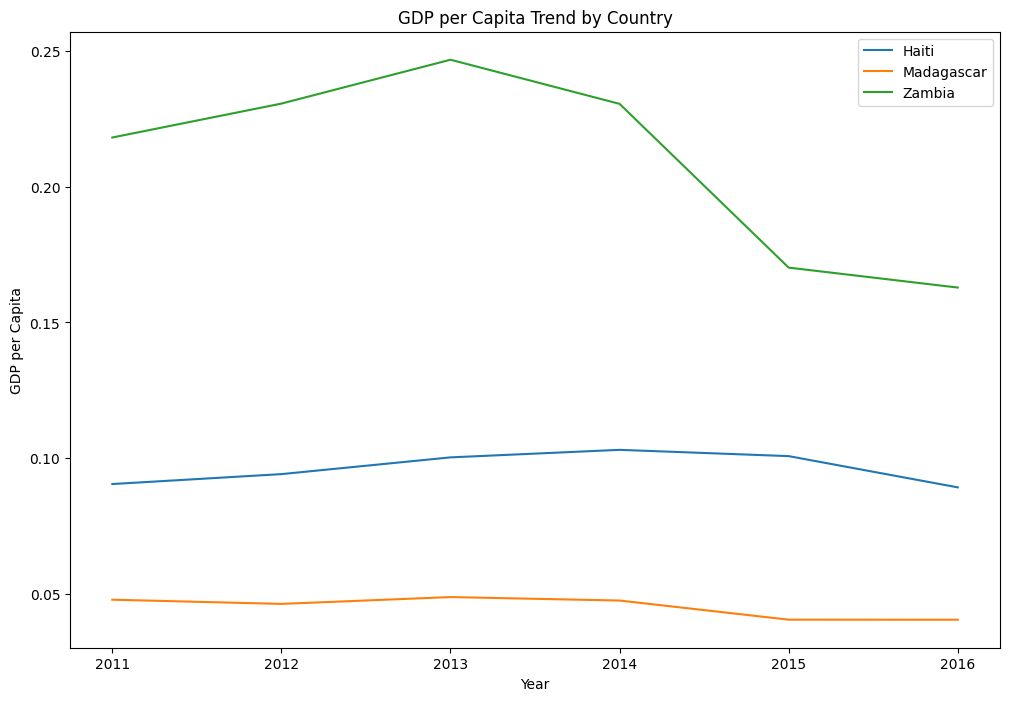

In [10]:
# Analisis Tren
plt.figure(figsize=(12, 8))
for country in selected_country['country_name'].unique():
    subset = selected_country[selected_country['country_name'] == country]
    plt.plot(subset['year'], subset['gdp_per_capita'], label=country)
plt.legend()
plt.title('GDP per Capita Trend by Country')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.savefig('image/tren_graphic.png', dpi=300)
plt.show()


#### Perbandingan

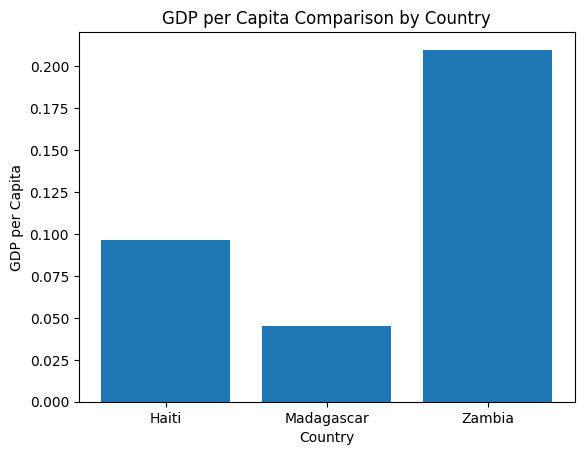

In [12]:
# Analisis Perbandingan
gdp = selected_country.groupby(["country_name"]).mean()
gdp_by_country = gdp['gdp_per_capita']
country = gdp.index.get_level_values(0).to_list()

plt.title("GDP per Capita Comparison by Country")
plt.xlabel("Country")
plt.ylabel("GDP per Capita")

plt.bar(country, gdp_by_country)
plt.savefig('image/comparison_graphic.png', dpi=300)
plt.show()